In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
from windrose import WindroseAxes
from dateutil.parser import parse


### EPW y Documentacion
1. [OneBuilding.org](https://climate.onebuilding.org/)
1. [EPW Documentation](https://energyplus.net/assets/nrel_custom/pdfs/pdfs_v9.6.0/AuxiliaryPrograms.pdf)

In [2]:
texto = """
2.9.1.1 Field: Year
2.9.1.2 Field: Month
2.9.1.3 Field: Day
2.9.1.4 Field: Hour
2.9.1.5 Field: Minute
2.9.1.6 Field: Data Source and Uncertainty Flags
2.9.1.7 Field: Dry Bulb Temperature
2.9.1.8 Field: Dew Point Temperature
2.9.1.9 Field: Relative Humidity
2.9.1.10 Field: Atmospheric Station Pressure
2.9.1.11 Field: Extraterrestrial Horizontal Radiation
2.9.1.12 Field: Extraterrestrial Direct Normal Radiation
2.9.1.13 Field: Horizontal Infrared Radiation Intensity
2.9.1.14 Field: Global Horizontal Radiation
2.9.1.15 Field: Direct Normal Radiation
2.9.1.16 Field: Diffuse Horizontal Radiation
2.9.1.17 Field: Global Horizontal Illuminance
2.9.1.18 Field: Direct Normal Illuminance
2.9.1.19 Field: Diffuse Horizontal Illuminance
2.9.1.20 Field: Zenith Luminance
2.9.1.21 Field: Wind Direction
2.9.1.22 Field: Wind Speed
2.9.1.23 Field: Total Sky Cover
2.9.1.24 Field: Opaque Sky Cover
2.9.1.25 Field: Visibility
2.9.1.26 Field: Ceiling Height
2.9.1.27 Field: Present Weather Observation
"""

In [3]:
nombres = []
titulos = texto.split("\n")[1:-1]
for titulo in titulos:
#     print(titulo.split(":")[1].lstrip().rstrip())
    nombres.append(titulo.split(":")[1].lstrip().rstrip())
nombres

['Year',
 'Month',
 'Day',
 'Hour',
 'Minute',
 'Data Source and Uncertainty Flags',
 'Dry Bulb Temperature',
 'Dew Point Temperature',
 'Relative Humidity',
 'Atmospheric Station Pressure',
 'Extraterrestrial Horizontal Radiation',
 'Extraterrestrial Direct Normal Radiation',
 'Horizontal Infrared Radiation Intensity',
 'Global Horizontal Radiation',
 'Direct Normal Radiation',
 'Diffuse Horizontal Radiation',
 'Global Horizontal Illuminance',
 'Direct Normal Illuminance',
 'Diffuse Horizontal Illuminance',
 'Zenith Luminance',
 'Wind Direction',
 'Wind Speed',
 'Total Sky Cover',
 'Opaque Sky Cover',
 'Visibility',
 'Ceiling Height',
 'Present Weather Observation']

In [4]:
len(nombres)

27

In [5]:
for i,nombre in enumerate(nombres):
    print(i,nombre)

0 Year
1 Month
2 Day
3 Hour
4 Minute
5 Data Source and Uncertainty Flags
6 Dry Bulb Temperature
7 Dew Point Temperature
8 Relative Humidity
9 Atmospheric Station Pressure
10 Extraterrestrial Horizontal Radiation
11 Extraterrestrial Direct Normal Radiation
12 Horizontal Infrared Radiation Intensity
13 Global Horizontal Radiation
14 Direct Normal Radiation
15 Diffuse Horizontal Radiation
16 Global Horizontal Illuminance
17 Direct Normal Illuminance
18 Diffuse Horizontal Illuminance
19 Zenith Luminance
20 Wind Direction
21 Wind Speed
22 Total Sky Cover
23 Opaque Sky Cover
24 Visibility
25 Ceiling Height
26 Present Weather Observation


In [44]:
f = '../data/001_raw/Casablanca.epw'
clima = pd.read_csv(f,skiprows=8,header=None,names=nombres,usecols=range(27))
clima.Minute = 0
clima.loc[clima.Hour==24,['Hour','Minute']] = [23,59]
clima['tiempo'] = clima.Year.astype('str') + '-' + clima.Month.astype('str')  + '-' + clima.Day.astype('str') + ' ' + clima.Hour.astype('str') + ':' + clima.Minute.astype('str') 
clima.tiempo = pd.to_datetime(clima.tiempo,format='%Y-%m-%d %H:%M')
clima.set_index('tiempo',inplace=True)
del clima['Year']
del clima['Month']
del clima['Day']
del clima['Hour']
del clima['Minute']
clima.head(2)

,Data Source and Uncertainty Flags,Dry Bulb Temperature,Dew Point Temperature,Relative Humidity,Atmospheric Station Pressure,Extraterrestrial Horizontal Radiation,Extraterrestrial Direct Normal Radiation,Horizontal Infrared Radiation Intensity,Global Horizontal Radiation,Direct Normal Radiation,...,Direct Normal Illuminance,Diffuse Horizontal Illuminance,Zenith Luminance,Wind Direction,Wind Speed,Total Sky Cover,Opaque Sky Cover,Visibility,Ceiling Height,Present Weather Observation
tiempo,,,,,,,,,,,,,,,,,,,,,
1958-01-01 01:00:00,?9?9?9?9E0?9?9?9*9*9?9?9?9?9*9?9*9*9*9*9*9*9,11.8,7.5,75,101177,0,0,326,0,0,...,0,0,0,358,2.3,7,7,777.7,77777,9
1958-01-01 02:00:00,?9?9?9?9E0?9?9?9*9*9?9?9?9?9*9?9*9*9*9*9*9*9,11.5,7.8,78,101166,0,0,325,0,0,...,0,0,0,198,2.4,7,7,777.7,77777,9


In [50]:
renombres = {'Dry Bulb Temperature':'To_ruoa',
            'Relative Humidity':'rh_ruoa',
            'Global Horizontal Radiation':'Ig_ruoa',
            'Wind Direction':'wd_ruoa',
            'Wind Speed':'ws_ruoa',}

clima.rename(columns =  renombres,inplace=True)

In [51]:
 clima.columns

Index(['Data Source and Uncertainty Flags', 'To_ruoa', 'Dew Point Temperature',
       'rh_ruoa', 'Atmospheric Station Pressure',
       'Extraterrestrial Horizontal Radiation',
       'Extraterrestrial Direct Normal Radiation',
       'Horizontal Infrared Radiation Intensity', 'Ig_ruoa',
       'Direct Normal Radiation', 'Diffuse Horizontal Radiation',
       'Global Horizontal Illuminance', 'Direct Normal Illuminance',
       'Diffuse Horizontal Illuminance', 'Zenith Luminance', 'wd_ruoa',
       'ws_ruoa', 'Total Sky Cover', 'Opaque Sky Cover', 'Visibility',
       'Ceiling Height', 'Present Weather Observation'],
      dtype='object')

In [52]:
meses = calendar.month_name[1:]
meses = ["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"]
# meses

In [53]:
To = clima.To_ruoa.groupby(by=[clima.index.month,clima.index.hour]).mean().unstack().T
# To = pd.concat([To[6:],To[0:5]],axis=0)

hr = clima.rh_ruoa.groupby(by=[clima.index.month,clima.index.hour]).mean().unstack().T
# hr = pd.concat([hr[6:],hr[0:5]],axis=0)

Ig = clima.Ig_ruoa.groupby(by=[clima.index.month,clima.index.hour]).mean().unstack().T

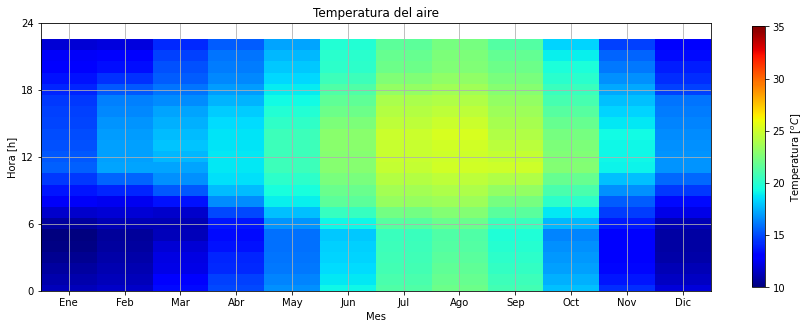

In [54]:
fig, ax = plt.subplots(figsize=(15,10))
p = ax.imshow(To,cmap="jet",aspect=.2,vmin=10, vmax=35)

ax.set_xticks(np.arange(0,12,1))
ax.set_ylim(0,24)
ax.set_yticks(np.linspace(0,24,5))
ax.set_xticklabels(meses)
ax.set_ylabel("Hora [h]")
ax.set_xlabel("Mes")
ax.set_title("Temperatura del aire")
ax.grid()
fig.colorbar(p,shrink=0.48,ticks=np.arange(5,36,5),label="Temperatura [$^oC$]")

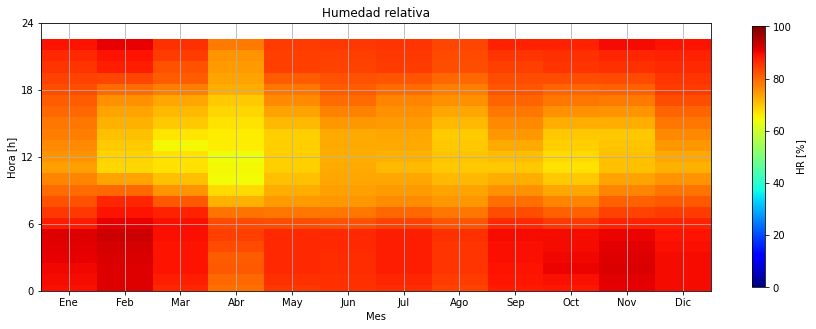

In [55]:
fig, ax = plt.subplots(figsize=(15,10))
p = ax.imshow(hr,cmap="jet",aspect=.2,vmin=0,vmax=100)
ax.set_xticks(np.arange(0,12,1))
ax.set_ylim(0,24)
ax.set_yticks(np.linspace(0,24,5))
ax.set_xticklabels(meses)
ax.set_ylabel("Hora [h]")
ax.set_xlabel("Mes")
ax.set_title("Humedad relativa")
ax.grid()

fig.colorbar(p,shrink=0.48,ticks=np.arange(0,101,20),label="HR [$\%$]")

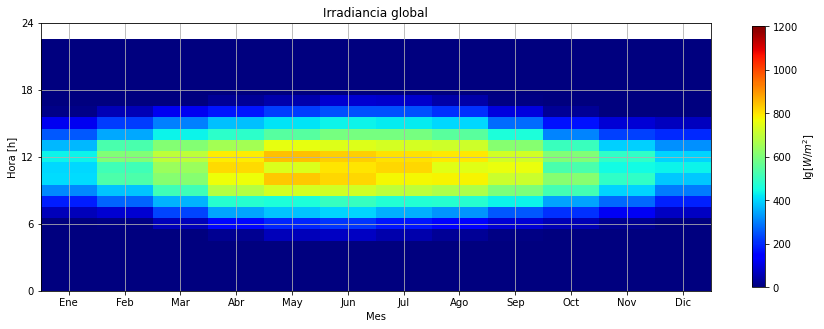

In [56]:
fig, ax = plt.subplots(figsize=(15,10))
p = ax.imshow(Ig,cmap="jet",aspect=.2,vmin=0,vmax=1200)
ax.set_xticks(np.arange(0,12,1))
ax.set_ylim(0,24)
ax.set_yticks(np.linspace(0,24,5))
ax.set_xticklabels(meses)
ax.set_ylabel("Hora [h]")
ax.set_xlabel("Mes")
ax.set_title("Irradiancia global")
ax.grid()

fig.colorbar(p,shrink=0.48,ticks=np.arange(0,1201,200),label="Ig[$W/m^2$]")

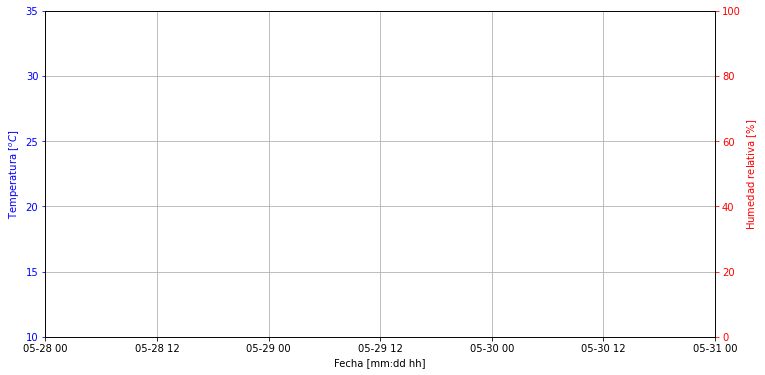

In [57]:
fig, ax1 = plt.subplots(figsize=(12,6))

fecha1 = parse( '2018-05-28')
fecha2 = fecha1 + pd.Timedelta("3D")

ax1.set_xlim(fecha1,fecha2)
ax2 = ax1.twinx()

ax1.plot(clima.To_ruoa,'b-',label="To")
ax2.plot(clima.rh_ruoa,'r-')

ax1.set_ylabel("Temperatura [$^oC$]"    ,color="b")
ax2.set_ylabel("Humedad relativa [$\%$]",color='r',)
ax1.set_xlabel("Fecha [mm:dd hh]")
ax1.set_ylim(10,35)
ax2.set_ylim(0,100)
ax1.grid()
ax2.tick_params(axis='y', colors='r')
ax1.tick_params(axis='y', colors='b')



# fig.label()

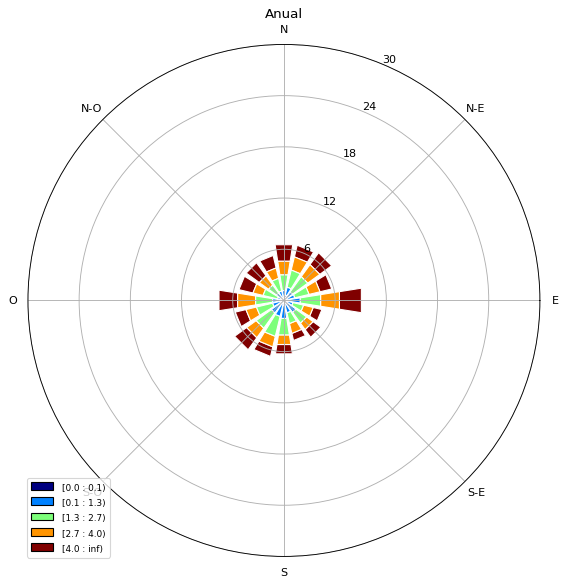

In [58]:
ax = WindroseAxes.from_ax(rmax=30,theta_labels=["E", "N-E", "N", "N-O", "O", "S-O", "S", "S-E"])
ax.set_title('Anual')
rangos = [0., 0.1,1.34,2.67,4]

ax.bar(clima.wd_ruoa,clima.ws_ruoa, bins= rangos,normed=True, opening=.8, edgecolor='white')
ax.set_legend()



In [59]:
noche = pd.concat([clima.between_time('0:00:00','7:59:59'),clima.between_time('20:00:01','23:59:59')],axis=0)
dia   = pd.concat([clima.between_time('8:00:00','20:00:00')],axis=0)

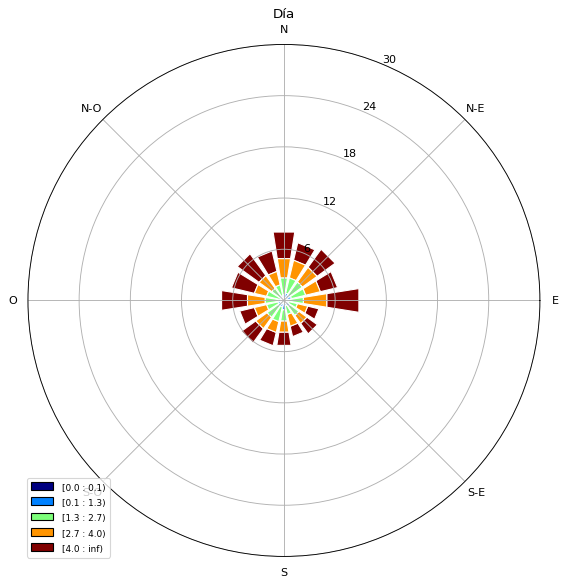

In [60]:
ax = WindroseAxes.from_ax(rmax=30,theta_labels=["E", "N-E", "N", "N-O", "O", "S-O", "S", "S-E"])
ax.set_title('Día')
ax.bar(dia.wd_ruoa, dia.ws_ruoa, bins= rangos,normed=True, opening=.8, edgecolor='white')
ax.set_legend()


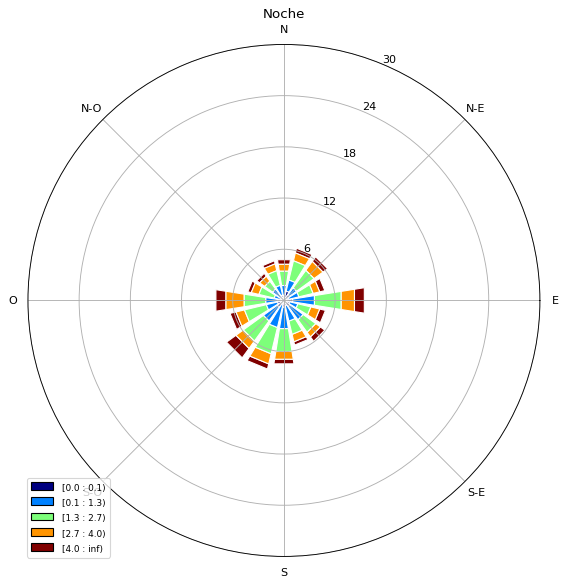

In [61]:
ax = WindroseAxes.from_ax(rmax=30,theta_labels=["E", "N-E", "N", "N-O", "O", "S-O", "S", "S-E"])
ax.set_title('Noche')
ax.bar(noche.wd_ruoa, noche.ws_ruoa, bins= rangos,normed=True, opening=.8, edgecolor='white')
ax.set_legend()


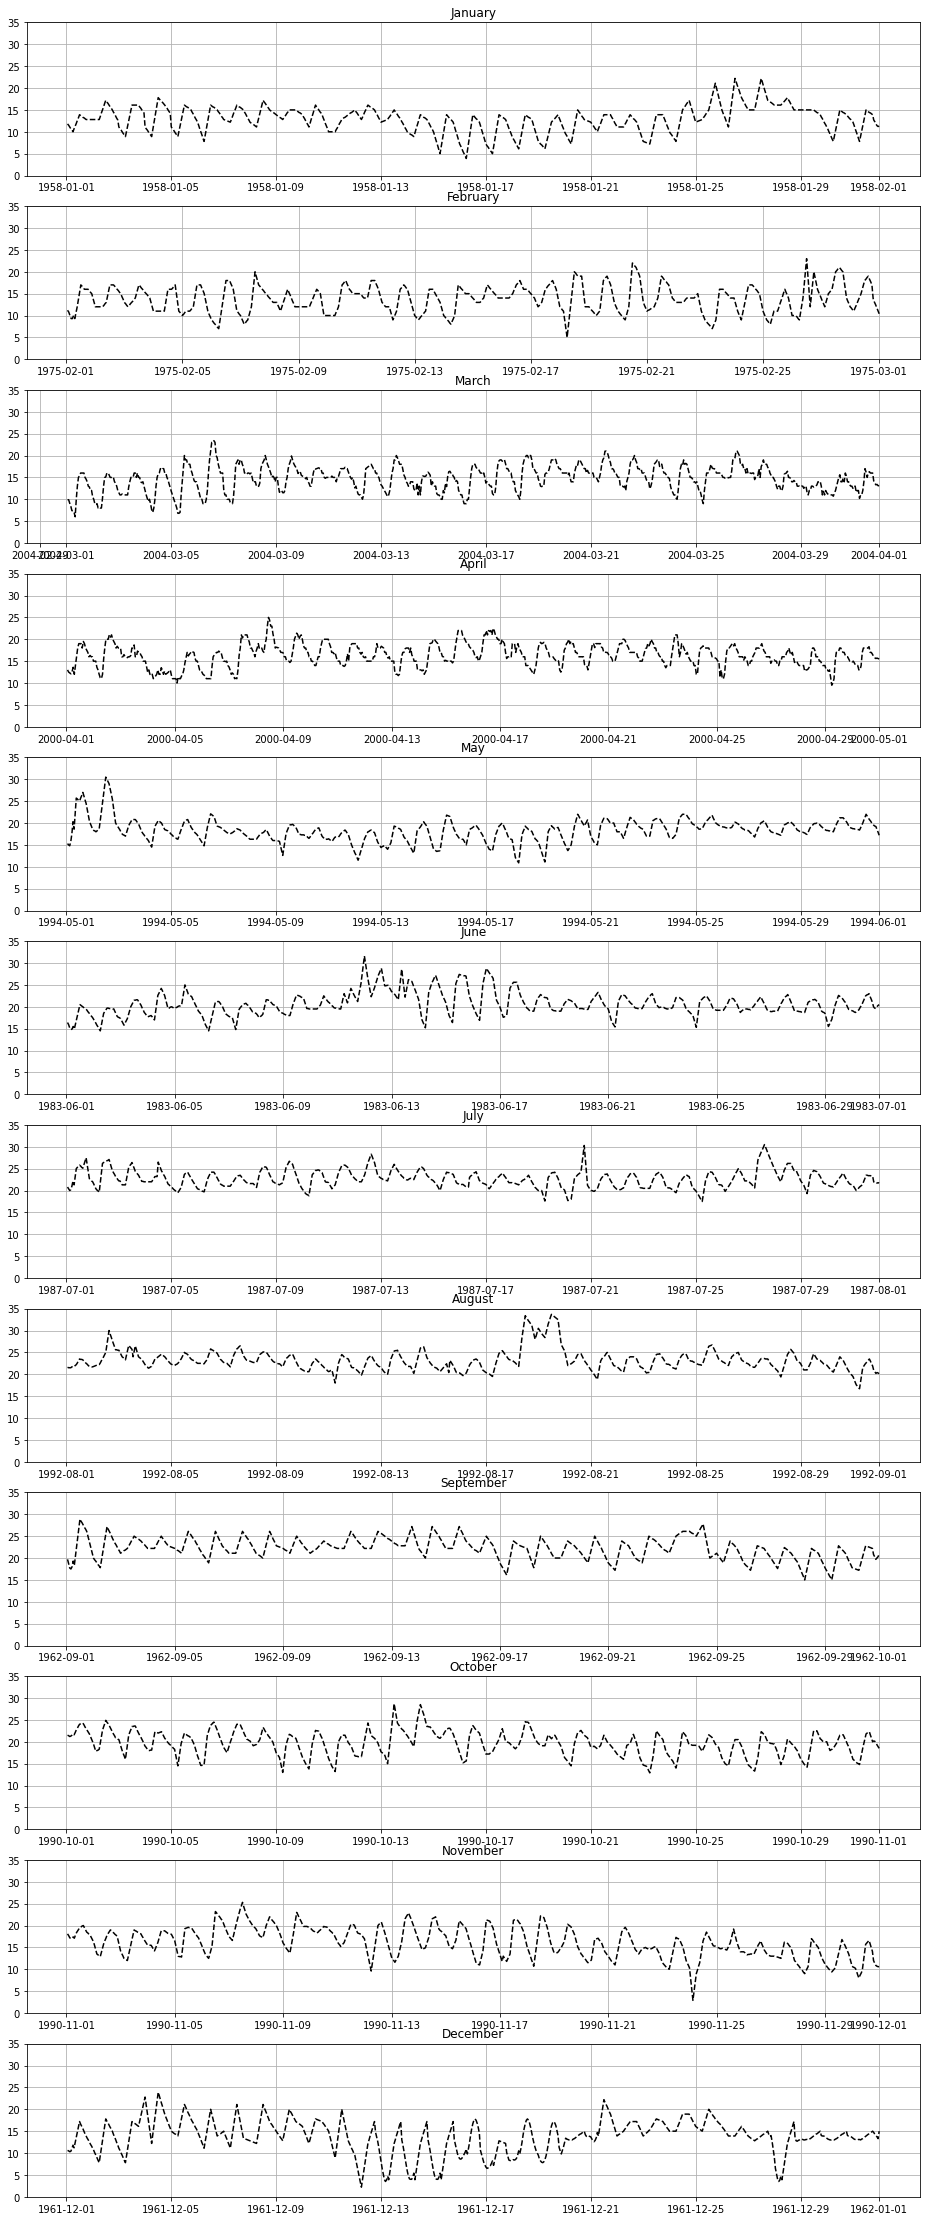

In [62]:
fig, ax1 = plt.subplots(12,1,figsize=(16,40))
meses = calendar.month_name[1:]
for i,mes in enumerate(meses):
    ax1[i].set_title(mes)
    ax1[i].set_ylim(0,35)
    ax1[i].plot(clima[clima.index.month_name()==mes].To_ruoa   ,'k--')
    
#     ax[i] = ax1[i].twinx()
#     ax[i].plot(clima[clima.index.month_name()==mes].rh_ruoa,'r--')
#     ax[i].set_ylim(0,100)
    
#     
    ax1[i].grid()

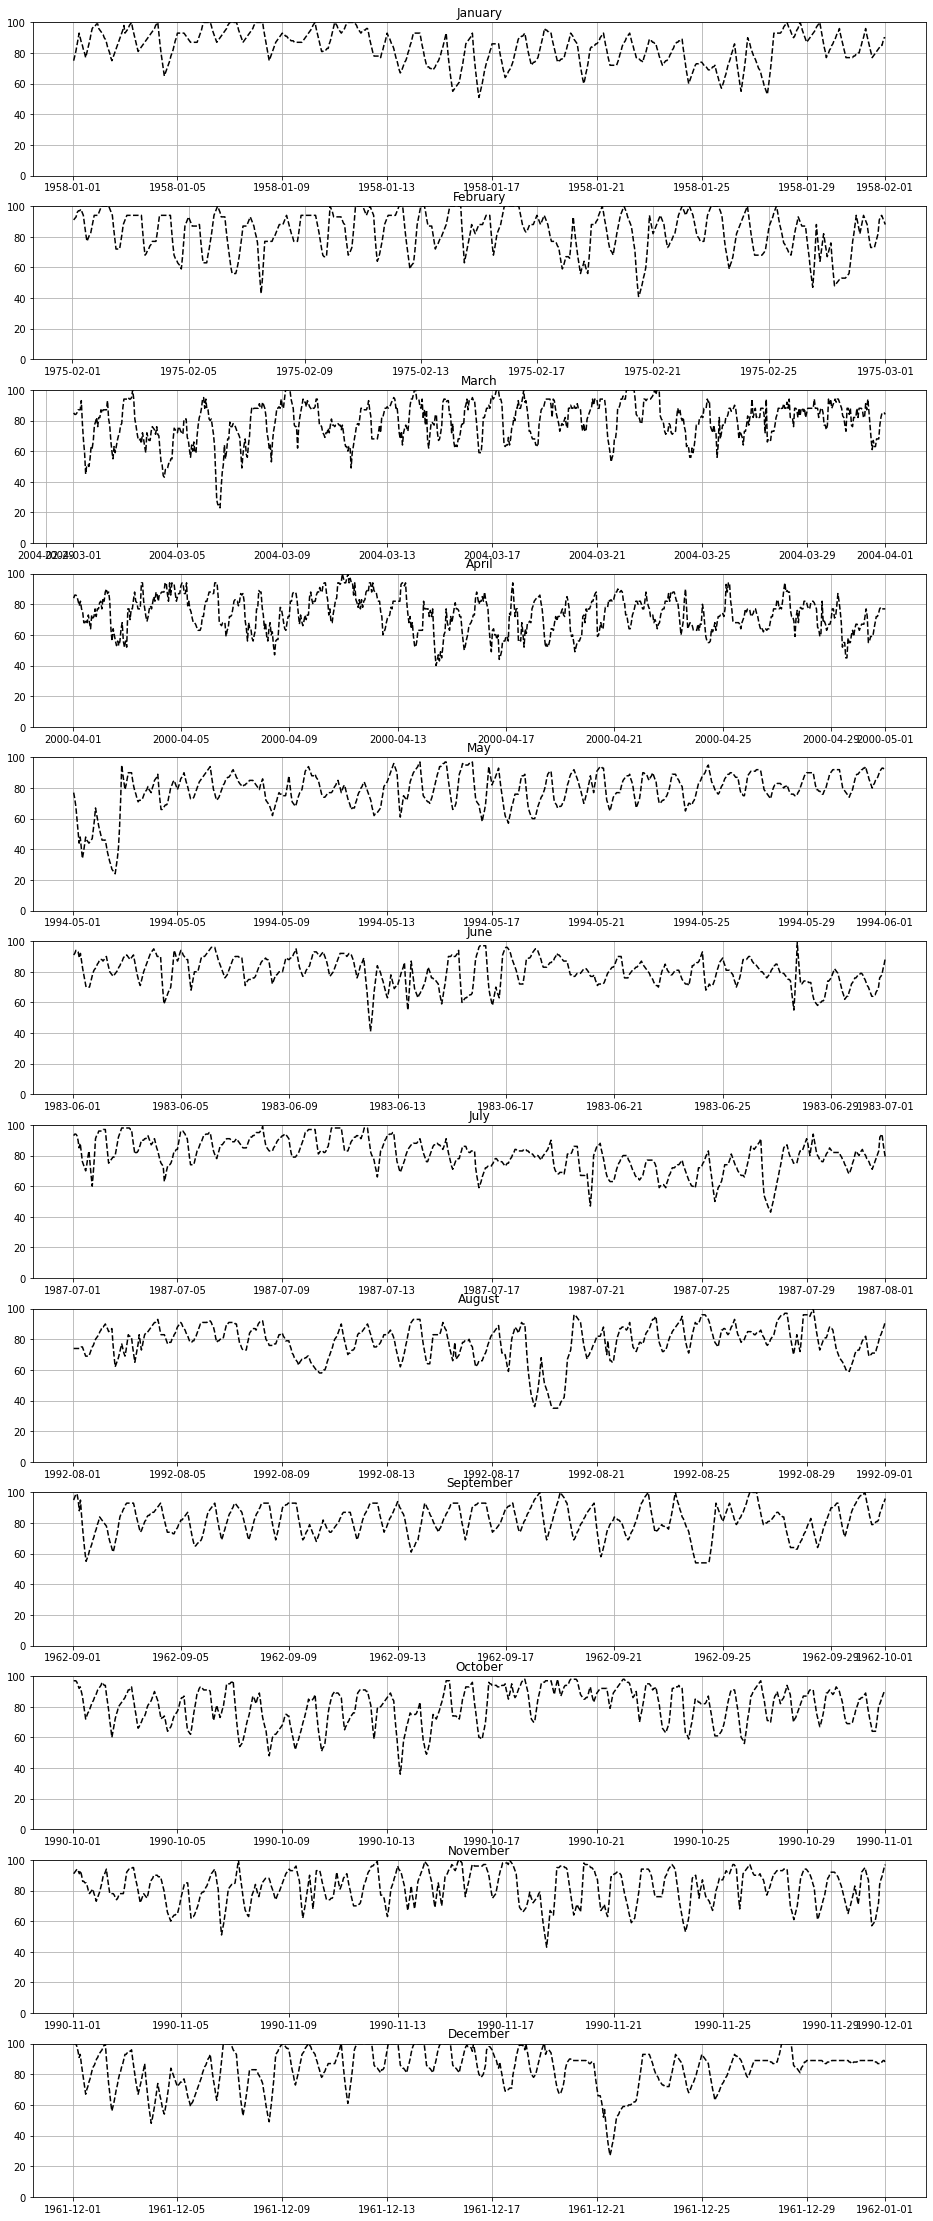

In [63]:
fig, ax = plt.subplots(12,1,figsize=(16,40))
meses = calendar.month_name[1:]

for i,mes in enumerate(meses):
    ax[i].plot(clima[clima.index.month_name()==mes].rh_ruoa,'k--')
    
    ax[i].grid()
    ax[i].set_title(mes)
    ax[i].set_ylim(0,100)

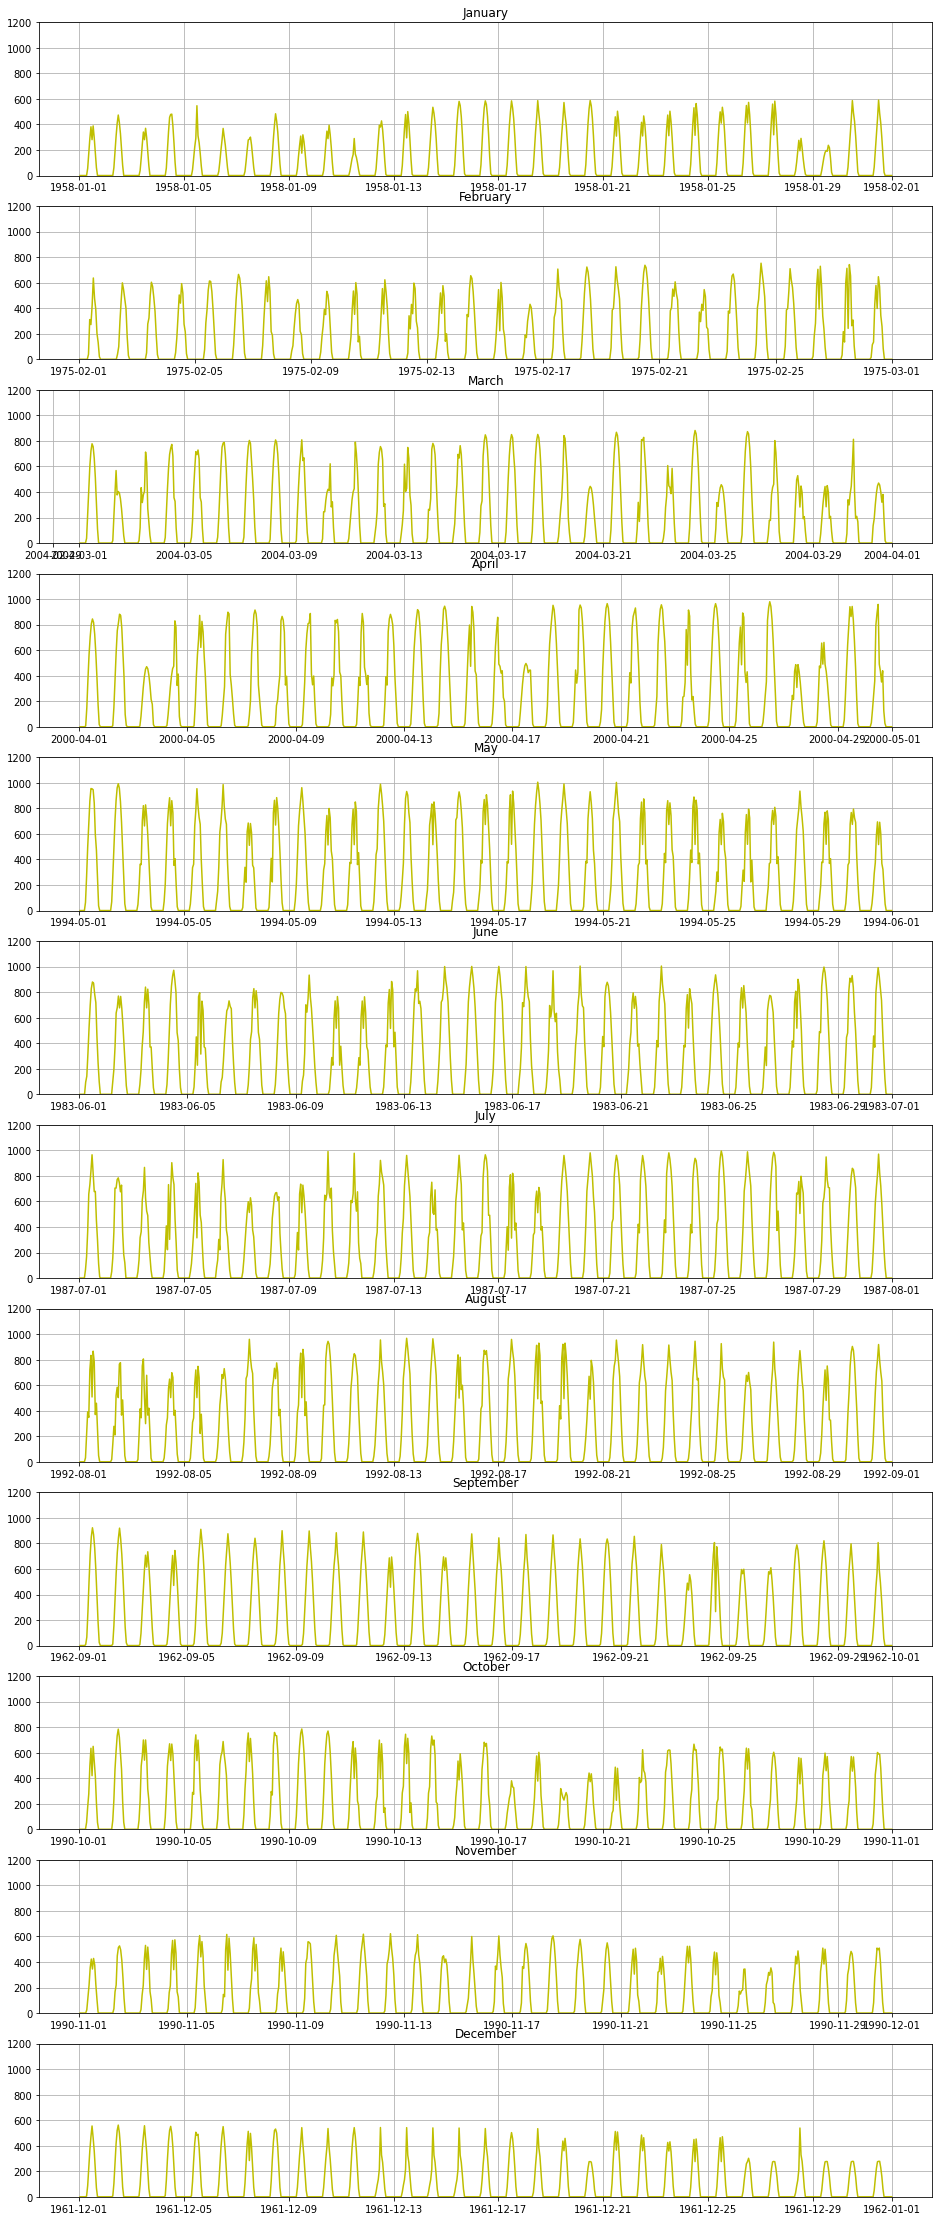

In [64]:
fig, ax = plt.subplots(12,1,figsize=(16,40))
meses = calendar.month_name[1:]

for i,mes in enumerate(meses):
    ax[i].plot(clima[clima.index.month_name()==mes].Ig_ruoa,'y-')
    
    ax[i].grid()
    ax[i].set_title(mes)
    ax[i].set_ylim(0,1200)